In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [106]:
bear1 = pd.read_csv(r'C:\Users\User\Desktop\hh.csv')
bear2 = pd.read_csv(r'C:\Users\User\Desktop\hh.csv')

In [4]:
bear1.columns

Index(['Unnamed: 0', 'Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness',
       'Kurtosis', 'P2P', 'Crest Factor', 'Variance', 'Fault', 'Defect'],
      dtype='object')

In [5]:
bear1=bear1.drop(labels='Unnamed: 0',axis=1)
bear1=bear1.drop(labels='Defect',axis=1)

In [6]:
bear1.dropna(inplace=True)

In [7]:
bear1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Fault
0,0.32,-0.2,0.047824,0.064290,0.080101,0.001269,1.847866,0.12,3.994980,0.004133,inner
1,0.96,-0.2,0.049203,0.074959,0.089633,3.380106,38.374250,0.76,10.710320,0.005619,inner
2,0.90,-0.2,0.047670,0.067443,0.082561,2.494656,26.407668,0.70,10.901036,0.004549,inner
3,0.35,-1.0,0.047955,0.069054,0.084044,-3.219543,53.590734,-0.65,4.164495,0.004768,inner
4,0.96,-0.2,0.048518,0.069309,0.084575,2.487599,30.184741,0.76,11.350878,0.004804,inner
...,...,...,...,...,...,...,...,...,...,...,...
899,0.51,-0.2,0.155025,0.080029,0.174445,0.055514,1.682962,0.31,2.923561,0.006405,Roller
900,0.54,-0.2,0.160798,0.081969,0.180467,0.347105,1.352100,0.34,2.992244,0.006719,Roller
901,0.53,-0.2,0.157371,0.078050,0.175645,0.360563,2.130960,0.33,3.017455,0.006092,Roller
902,1.04,-0.2,0.160827,0.086393,0.182542,1.437458,11.497220,0.84,5.697309,0.007464,Roller


<AxesSubplot:>

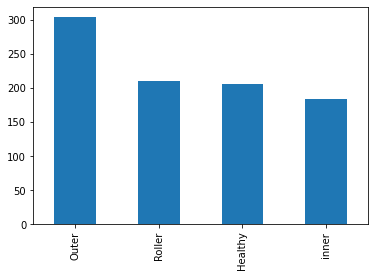

In [8]:
bear1["Fault"].value_counts().plot.bar(legend=None)

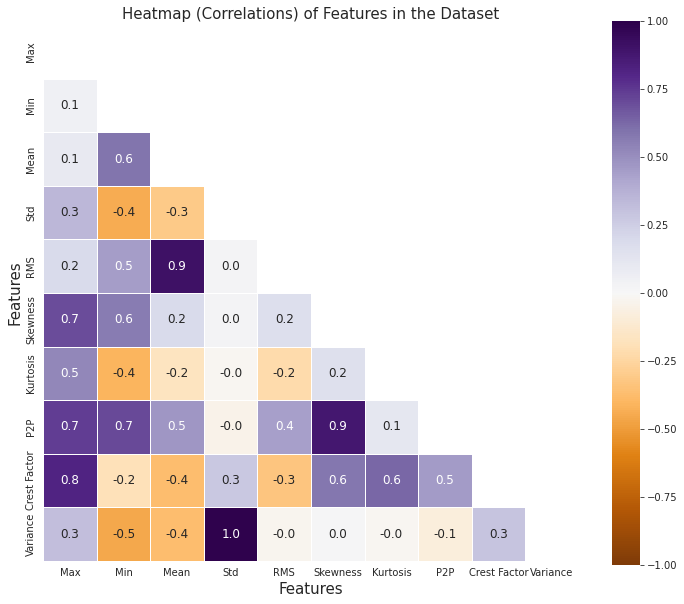

In [10]:
dataset_corr = bear1.corr().round(4)

# Drop Agent_ID from correlation dataset.
#dataset_corr = dataset_corr.drop(["Agent_ID"], axis=1)
#dataset_corr = dataset_corr.drop(["Agent_ID"], axis=0)

# Create a correlation matrix. Only bottom left corner valued. 
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn. 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

In [11]:
def data_summary(df):
    '''Summary dataframe information'''

    df = pd.DataFrame({'type': df.dtypes,
                       'amount': df.isna().sum(),
                       'unique': df.nunique(),
                       'max' : df.max(),
                       'min' : df.min(),
                       'mean' : df.mean() })
    return df

In [12]:
data_summary(bear1)

C:\Users\User\AppData\Local\Temp\ipykernel_11140\2806944562.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'mean' : df.mean() })


,type,amount,unique,max,min,mean
Crest Factor,float64,0,904,16.404196,1.662151,4.384222
Fault,object,0,4,inner,Healthy,NaN
Kurtosis,float64,0,904,89.044723,-0.396894,10.202765
Max,float64,0,76,2.0,0.24,0.676084
Mean,float64,0,901,0.290169,-0.032784,0.130332
Min,float64,0,26,0.02,-1.2,-0.254867
P2P,float64,0,164,1.8,-0.81,0.421217
RMS,float64,0,904,0.297782,0.075168,0.159793
Skewness,float64,0,904,5.788816,-5.064335,0.476663
Std,float64,0,904,0.145077,0.041061,0.082672


In [13]:
from pycaret.classification import *
exp_name = setup(data = bear1 ,  target = 'Fault',normalize = True,fix_imbalance=True, session_id=89)

,Description,Value
0,session_id,89
1,Target,Fault
2,Target Type,Multiclass
3,Label Encoded,"Healthy: 0, Outer: 1, Roller: 2, inner: 3"
4,Original Data,"(904, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8941,0.9737,0.9012,0.8984,0.8936,0.8565,0.8582,0.2270
rf,Random Forest Classifier,0.8893,0.9700,0.8946,0.8932,0.8889,0.8495,0.8512,0.1810
catboost,CatBoost Classifier,0.8862,0.9717,0.8944,0.8891,0.8860,0.8456,0.8468,7.4970
xgboost,Extreme Gradient Boosting,0.8767,0.9701,0.8851,0.8822,0.8761,0.8326,0.8352,0.2450
et,Extra Trees Classifier,0.8735,0.9684,0.8812,0.8767,0.8729,0.8283,0.8298,0.1510
gbc,Gradient Boosting Classifier,0.8624,0.9670,0.8721,0.8666,0.8622,0.8134,0.8151,0.5010
knn,K Neighbors Classifier,0.8560,0.9503,0.8695,0.8584,0.8545,0.8056,0.8076,0.0240
dt,Decision Tree Classifier,0.8481,0.8946,0.8612,0.8534,0.8470,0.7948,0.7978,0.0160
qda,Quadratic Discriminant Analysis,0.7897,0.9354,0.8114,0.8010,0.7886,0.7166,0.7220,0.0200
nb,Naive Bayes,0.7486,0.8823,0.7536,0.7531,0.7411,0.6555,0.6633,0.0150


In [16]:
compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8941,0.9737,0.9012,0.8984,0.8936,0.8565,0.8582,0.2230
rf,Random Forest Classifier,0.8893,0.9700,0.8946,0.8932,0.8889,0.8495,0.8512,0.2050
catboost,CatBoost Classifier,0.8862,0.9717,0.8944,0.8891,0.8860,0.8456,0.8468,7.3850
xgboost,Extreme Gradient Boosting,0.8767,0.9701,0.8851,0.8822,0.8761,0.8326,0.8352,0.2060
et,Extra Trees Classifier,0.8735,0.9684,0.8812,0.8767,0.8729,0.8283,0.8298,0.1520
gbc,Gradient Boosting Classifier,0.8624,0.9670,0.8721,0.8666,0.8622,0.8134,0.8151,0.5300
knn,K Neighbors Classifier,0.8560,0.9503,0.8695,0.8584,0.8545,0.8056,0.8076,0.0260
dt,Decision Tree Classifier,0.8481,0.8946,0.8612,0.8534,0.8470,0.7948,0.7978,0.0160
qda,Quadratic Discriminant Analysis,0.7897,0.9354,0.8114,0.8010,0.7886,0.7166,0.7220,0.0140
lr,Logistic Regression,0.7342,0.8987,0.7587,0.7389,0.7329,0.6412,0.6439,0.0440


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=89, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=89, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [18]:
qda = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9597,0.8826,0.8881,0.8750,0.8300,0.8336
1,0.8281,0.9461,0.8405,0.8241,0.8232,0.7670,0.7688
2,0.9365,0.9773,0.9381,0.9365,0.9351,0.9139,0.9149
3,0.8571,0.9660,0.8738,0.8633,0.8591,0.8071,0.8080
4,0.9365,0.9936,0.9429,0.9365,0.9365,0.9141,0.9141
5,0.8889,0.9863,0.9024,0.8910,0.8887,0.8500,0.8509
6,0.8889,0.9667,0.8952,0.8968,0.8909,0.8500,0.8512
7,0.9365,0.9945,0.9464,0.9386,0.9359,0.9146,0.9158
8,0.8730,0.9709,0.8702,0.8819,0.8706,0.8268,0.8315


In [19]:
tun_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9645,0.8879,0.8781,0.8747,0.8304,0.8315
1,0.8438,0.9465,0.8524,0.8411,0.8397,0.7879,0.7897
2,0.8889,0.9795,0.9024,0.8893,0.8875,0.8503,0.8515
3,0.8571,0.9547,0.8690,0.8573,0.8569,0.8064,0.8066
4,0.9206,0.9872,0.9310,0.9220,0.9209,0.8929,0.8932
5,0.8889,0.9773,0.8976,0.8906,0.8894,0.8494,0.8497
6,0.8571,0.9694,0.8607,0.8683,0.8593,0.8063,0.8082
7,0.9683,0.9963,0.9762,0.9720,0.9685,0.9573,0.9586
8,0.8730,0.9566,0.8714,0.8828,0.8730,0.8269,0.8307


In [20]:
print(tun_qda)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=140, n_jobs=-1, num_leaves=80, objective=None,
               random_state=89, reg_alpha=0.05, reg_lambda=0.15, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
#hypertuning
tun_qda1=tune_model(qda,custom_grid ={'max_depth': [1,2,3],'min_child_samples' :[30],'learning rate' : [0.01],'reg_alpha' : [0.56,0.6], 'n_estimators': [140,160,200]},search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8906,0.9603,0.8992,0.8929,0.8904,0.8512,0.8521
1,0.8281,0.9477,0.8452,0.8232,0.8245,0.7680,0.7687
2,0.9048,0.9769,0.9143,0.9035,0.9036,0.8712,0.8715
3,0.8254,0.9570,0.8452,0.8326,0.8280,0.7643,0.7651
4,0.9048,0.9852,0.9095,0.9054,0.9035,0.8706,0.8718
5,0.8730,0.9685,0.8857,0.8749,0.8735,0.8282,0.8285
6,0.8889,0.9601,0.8952,0.8909,0.8894,0.8499,0.8502
7,0.9524,0.9949,0.9643,0.9572,0.9518,0.9361,0.9383
8,0.8571,0.9668,0.8476,0.8691,0.8534,0.8043,0.8124


In [22]:
print(tun_qda1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning rate=0.01, learning_rate=0.1,
               max_depth=3, min_child_samples=30, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
               objective=None, random_state=89, reg_alpha=0.6, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [118]:
g=finalize_model(tun_qda1)

In [119]:
save_model(g, 'Lightbgm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Fault',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning rate=0.01, learning_rate=0.1,
                                 max_depth=3, mi

In [120]:
a1=predict_model(g)
a1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9890,0.9998,0.9895,0.9890,0.9890,0.9851,0.9851


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Fault,Label,Score
0,0.968436,0.187249,-0.123537,0.212980,-0.256587,0.575615,-0.032633,0.809120,0.964097,0.122578,Healthy,Healthy,0.9955
1,0.558626,-2.449681,-1.629468,1.570695,-1.288437,-0.319372,0.180830,-1.261082,1.414485,1.615776,inner,inner,0.9987
2,-0.602503,0.543590,0.237745,-0.112754,0.126575,-0.130626,-0.699954,-0.057476,-0.647419,-0.189782,Roller,Roller,0.7760
3,1.412398,0.543590,0.477181,0.210063,0.504879,0.918905,0.325368,1.362779,0.860790,0.119701,Outer,Outer,0.5513
4,1.412398,0.543590,0.471726,0.473850,0.552926,0.846471,0.207228,1.362779,0.832985,0.385539,Roller,Roller,0.8367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,-0.636654,0.187249,0.634320,0.233341,0.715631,-0.294672,-0.711178,-0.322269,-0.839153,0.142692,Roller,Outer,0.6007
268,-1.046465,0.899932,0.438669,-0.976085,0.228504,-0.281331,-0.729433,-0.129692,-1.055714,-0.931775,Outer,Outer,0.9838
269,-0.500051,-2.307144,-1.714177,1.914525,-1.202605,-0.968613,-0.174639,-1.911029,0.055571,2.042864,inner,inner,0.9989
270,1.070889,0.187249,-0.032649,0.704955,-0.025551,2.080121,1.157632,0.881337,0.900294,0.628010,Healthy,Healthy,0.9911


In [30]:
a1['Score'].describe()

count    272.000000
mean       0.939705
std        0.094440
min        0.531000
25%        0.920825
50%        0.987300
75%        0.998225
max        0.999600
Name: Score, dtype: float64

In [99]:
te=([0.81327723,-0.071257335,0.1865952,0.013204217,0.16335147,0.089363198,1.861900409,0.010070388,6.098749459,0.000174351],
[0.47127622,-0.06731117,0.1763579,0.012991384,0.18110283,-0.067930011,0.275259641,-0.020183548,3.594706824,0.000168776],
   )


In [32]:
h1=([0.44,-0.2,0.123996,0.084099,0.149802,0.152354,0.479698,0.24,2.937215,0.007073],
    [0.45,-0.1,0.172497,0.069513,0.185964,0.331445,1.026297,0.35,2.419824,0.004832],
    [0.94,-0.2,0.131403,0.085051,0.156503,1.203879,8.536282,0.74,6.006293,0.007234],
    [0.53,-0.1,0.131569,0.078601,0.153239,0.293130,0.657648,0.43,3.458642,0.006178],
    [0.47,-1.0,0.122571,0.092435,0.153490,-1.672345,21.890319,-0.53,3.062093,0.008544]
)

In [33]:
h2=([0.93,-0.1,0.142014,0.067940,0.157414,1.586626,17.607589,0.83,5.907977,0.004616],
[0.33,-0.1,0.134848,0.060977,0.147982,0.023616,0.024349,0.23,2.230005,0.003718],
[0.38,0.0,0.135025,0.064258,0.149522,0.206172,0.028471,0.38,2.541439,0.004129],
[0.88,0.0,0.131468,0.061468,0.145114,1.779141,21.442603,0.88,6.064180,0.003778],
[0.35,-0.1,0.138022,0.064652,0.152400,-0.037061,-0.179668,0.25,2.296584,0.004180]
)

In [34]:
h3=([0.87,-0.1,0.131700,0.067312,0.147889,1.565363,14.516265,0.77,5.882777,0.004531],
[0.50,-0.1,0.133427,0.065908,0.148803,0.443677,1.624400,0.40,3.360147,0.004344],
[0.90,-0.1,0.140010,0.061990,0.153107,1.811952,22.342768,0.80,5.878252,0.003843],
[0.91,-0.1,0.131429,0.074594,0.151103,2.360906,22.344879,0.81,6.022372,0.005564],
[0.96,-0.1,0.129413,0.072858,0.148494,1.550910,16.211832,0.86,6.464887,0.005308])

In [35]:
i1=([0.91,-0.5,0.046495,0.071964,0.085647,1.414784,24.164072,0.41,10.624979,0.005179],
[0.90,-0.9,0.050566,0.070413,0.086660,-0.527620,53.647744,0.00,10.385446,0.004958],
[0.26,-0.2,0.053877,0.058863,0.079776,0.063231,1.832492,0.06,3.259141,0.003465],
[0.94,-8.0,0.047485,0.266089,0.270160,-28.028423,845.712005,-7.06,3.479420,0.070803],
[0.38,-0.2,0.050937,0.067351,0.084416,0.536414,2.236870,0.18,4.501510,0.004536])

In [36]:
i2=([0.81,-0.3,0.047779,0.095461,0.106707,0.764967,5.532956,0.51,7.590905,0.009113],
[0.60,-0.5,0.049372,0.099826,0.111323,-0.070157,4.159109,0.10,5.389743,0.009965],
   [0.57,-1.0,0.037088,0.126841,0.132091,-0.471857,5.857422,-0.43,4.315220,0.016089])

In [37]:
i3=([1.00,-1.0,-0.030020,0.116994,0.120727,-1.209682,18.664996,0.00,8.283161,0.013688],
[0.26,-0.9,-0.025442,0.100593,0.103711,-1.052930,5.843125,-0.64,2.506960,0.010119],
[1.10,-0.9,-0.037097,0.125717,0.131015,0.209913,9.017225,0.20,8.395988,0.015805],
[0.32,-1.0,-0.034768,0.105299,0.110840,-0.897372,6.961503,-0.68,2.887035,0.011088])

In [38]:
o1=([0.48,-0.1,0.151577,0.070922,0.167334,0.292632,1.208204,0.38,2.868523,0.005030],
[0.53,-0.2,0.163499,0.078457,0.181332,0.080639,1.328375,0.33,2.922818,0.006156],
[1.10,-0.1,0.168843,0.080271,0.186936,1.479434,17.701538,1.00,5.884375,0.006443],
[0.50,-0.4,0.153450,0.068876,0.168185,-0.348831,5.028597,0.10,2.972922,0.004744],
[0.56,-0.2,0.166305,0.081045,0.184984,0.020975,1.787201,0.36,3.027289,0.006568])

In [39]:
o2=([0.56,0.0,0.171578,0.082894,0.190535,0.337447,0.666960,0.56,2.939093,0.006871],
[0.56,0.0,0.174226,0.076419,0.190233,0.340678,0.947800,0.56,2.943751,0.005840],
[0.54,-0.1,0.162823,0.084601,0.183470,0.101105,0.634961,0.44,2.943258,0.007157],
[0.51,-0.1,0.166650,0.086712,0.187839,0.128636,0.425262,0.41,2.715087,0.007519],
[1.10,-0.2,0.163592,0.098397,0.190879,1.996309,16.345382,0.90,5.762819,0.009682])

In [40]:
o3=([1.04,-0.1,0.154434,0.084858,0.176192,1.157574,11.491961,0.94,5.902660,0.007201],
[1.13,-0.2,0.157336,0.079749,0.176375,1.765481,22.000948,0.93,6.406800,0.006360],
[0.56,0.0,0.170870,0.069421,0.184421,0.455573,1.641811,0.56,3.036529,0.004819],
[1.20,-0.1,0.140959,0.098588,0.171986,2.537921,22.875365,1.10,6.977321,0.009720],
[1.10,-0.2,0.152626,0.083007,0.173718,1.492731,16.958877,0.90,6.332098,0.006890])

In [41]:
r1=([0.38,-0.2,0.162735,0.065905,0.175561,-0.349290,0.922935,0.18,2.164489,0.004344],
[0.44,-0.2,0.158973,0.065441,0.171902,-0.244411,1.659661,0.24,2.559591,0.004283],
[0.50,-0.2,0.164316,0.069443,0.178374,-0.260703,2.051488,0.30,2.803103,0.004822],
[1.10,-0.2,0.161911,0.077674,0.179562,3.340634,42.075947,0.90,6.126032,0.006033],
[1.08,-0.1,0.162876,0.076553,0.179953,1.613647,20.257727,0.98,6.001580,0.005860])

In [42]:
r2=([0.45,-0.2,0.146087,0.079756,0.166421,0.161452,0.714523,0.25,2.703980,0.006361],
[0.56,-0.2,0.143810,0.082211,0.165629,0.218451,1.084127,0.36,3.381046,0.006759],
[0.59,-0.1,0.142085,0.090599,0.168487,0.575497,1.640793,0.49,3.501745,0.008208],
[0.59,-0.6,0.140870,0.097391,0.171230,0.022397,4.858825,-0.01,3.445651,0.009485],
[0.71,-0.2,0.141699,0.107962,0.178108,0.912137,3.140272,0.51,3.986340,0.011656])

In [43]:
r3=([0.51,-0.2,0.160686,0.081199,0.180018,0.275487,1.423003,0.31,2.833042,0.006593],
[0.54,-0.1,0.160111,0.080817,0.179333,0.264109,1.109702,0.44,3.011163,0.006531],
[0.53,-0.2,0.165943,0.084751,0.186313,0.200488,1.004413,0.33,2.844674,0.007183],
[0.47,-0.1,0.152004,0.078828,0.171210,0.221198,0.897788,0.37,2.745172,0.006214],
[0.45,-0.1,0.152931,0.075514,0.170542,0.135119,0.666280,0.35,2.638650,0.005702])

In [44]:
test=([-0.10,-1.4,-1.001714,0.151970,1.013164,0.178843,0.712588,-1.50,-0.098701,0.023095],
[0.09,-1.4,-1.021137,0.141186,1.030841,0.863843,5.816885,-1.31,0.087307,0.019934],
[0.23,-1.4,-1.009399,0.144717,1.019716,1.543453,11.114996,-1.17,0.225553,0.020943])

In [45]:
h1 = pd.DataFrame(h1)
df = pd.DataFrame(h1)
df.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

h2 = pd.DataFrame(h2)
df2 = pd.DataFrame(h2)
df2.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

h3 = pd.DataFrame(h3)
df12 = pd.DataFrame(h3)
df12.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [46]:
i1 = pd.DataFrame(i1)
df3 = pd.DataFrame(i1)
df3.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


i2 = pd.DataFrame(i2)
df4 = pd.DataFrame(i2)
df4.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


i3 = pd.DataFrame(i3)
df5 = pd.DataFrame(i3)
df5.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [47]:
o1 = pd.DataFrame(o1)
df6 = pd.DataFrame(o1)
df6.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

o2 = pd.DataFrame(o2)
df7 = pd.DataFrame(o2)
df7.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


o3 = pd.DataFrame(o3)
df8 = pd.DataFrame(o3)
df8.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [48]:
r1 = pd.DataFrame(r1)
df9 = pd.DataFrame(r1)
df9.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


r2 = pd.DataFrame(r2)
df10 = pd.DataFrame(r2)
df10.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

r3 = pd.DataFrame(r3)
df11 = pd.DataFrame(r3)
df11.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [100]:
t1 = pd.DataFrame(te)
t1 = pd.DataFrame(te)
t1.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [51]:
#test = pd.DataFrame(test)
#test = pd.DataFrame(test)
#test.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [52]:
#df1,df2,df12 = healthy A1,A2,A3
#df3,df4,df5 = inner A1,A2,A3
#df6,df7,df8 = outer A1,A2,A3
#df9,df10,df11 = roller A1,A2,A3

In [83]:
predict_model(f,data=mh)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.046799,-0.070271,-0.000056,0.011072,0.011072,0.017513,0.147874,-0.023472,4.226811,0.000123,inner,0.9975
1,0.050416,-0.066982,0.000215,0.011302,0.011304,-0.047234,0.197655,-0.016566,4.460054,0.000128,inner,0.9975
2,0.050416,-0.056788,0.000112,0.010957,0.010957,-0.085590,0.227349,-0.006372,4.601194,0.000120,inner,0.9974
3,0.041537,-0.068955,-0.000122,0.010880,0.010881,-0.064632,0.317789,-0.027418,3.817427,0.000118,inner,0.9975
4,0.033645,-0.075861,0.000012,0.010525,0.010525,-0.244623,0.805597,-0.042216,3.196796,0.000111,inner,0.9977
5,0.040222,-0.066653,0.000121,0.010634,0.010634,-0.159083,0.247304,-0.026432,3.782235,0.000113,inner,0.9974


In [62]:
predict_model(f,data=df12)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.87,-0.1,0.131700,0.067312,0.147889,1.565363,14.516265,0.77,5.882777,0.004531,Healthy,0.9996
1,0.50,-0.1,0.133427,0.065908,0.148803,0.443677,1.624400,0.40,3.360147,0.004344,Healthy,0.9944
2,0.90,-0.1,0.140010,0.061990,0.153107,1.811952,22.342768,0.80,5.878252,0.003843,Healthy,0.9992
3,0.91,-0.1,0.131429,0.074594,0.151103,2.360906,22.344879,0.81,6.022372,0.005564,Healthy,0.9993
4,0.96,-0.1,0.129413,0.072858,0.148494,1.550910,16.211832,0.86,6.464887,0.005308,Healthy,0.9992


In [63]:
predict_model(f,data=df)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.44,-0.2,0.123996,0.084099,0.149802,0.152354,0.479698,0.24,2.937215,0.007073,Healthy,0.8582
1,0.45,-0.1,0.172497,0.069513,0.185964,0.331445,1.026297,0.35,2.419824,0.004832,Healthy,0.8082
2,0.94,-0.2,0.131403,0.085051,0.156503,1.203879,8.536282,0.74,6.006293,0.007234,Healthy,0.9796
3,0.53,-0.1,0.131569,0.078601,0.153239,0.293130,0.657648,0.43,3.458642,0.006178,Healthy,0.9971
4,0.47,-1.0,0.122571,0.092435,0.153490,-1.672345,21.890319,-0.53,3.062093,0.008544,Healthy,0.9992


In [64]:
predict_model(f,data=df2)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.93,-0.1,0.142014,0.067940,0.157414,1.586626,17.607589,0.83,5.907977,0.004616,Healthy,0.9944
1,0.33,-0.1,0.134848,0.060977,0.147982,0.023616,0.024349,0.23,2.230005,0.003718,Healthy,0.9982
2,0.38,0.0,0.135025,0.064258,0.149522,0.206172,0.028471,0.38,2.541439,0.004129,Healthy,0.9985
3,0.88,0.0,0.131468,0.061468,0.145114,1.779141,21.442603,0.88,6.064180,0.003778,Healthy,0.9985
4,0.35,-0.1,0.138022,0.064652,0.152400,-0.037061,-0.179668,0.25,2.296584,0.004180,Healthy,0.9973


In [65]:
predict_model(f,data=df3)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.91,-0.5,0.046495,0.071964,0.085647,1.414784,24.164072,0.41,10.624979,0.005179,inner,0.9979
1,0.90,-0.9,0.050566,0.070413,0.086660,-0.527620,53.647744,0.00,10.385446,0.004958,inner,0.9986
2,0.26,-0.2,0.053877,0.058863,0.079776,0.063231,1.832492,0.06,3.259141,0.003465,inner,0.9992
3,0.94,-8.0,0.047485,0.266089,0.270160,-28.028423,845.712005,-7.06,3.479420,0.070803,inner,0.9699
4,0.38,-0.2,0.050937,0.067351,0.084416,0.536414,2.236870,0.18,4.501510,0.004536,inner,0.9992


In [66]:
predict_model(f,data=df4)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.81,-0.3,0.047779,0.095461,0.106707,0.764967,5.532956,0.51,7.590905,0.009113,inner,0.9986
1,0.60,-0.5,0.049372,0.099826,0.111323,-0.070157,4.159109,0.10,5.389743,0.009965,inner,0.9993
2,0.57,-1.0,0.037088,0.126841,0.132091,-0.471857,5.857422,-0.43,4.315220,0.016089,inner,0.9989


In [67]:
predict_model(f,data=df5)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,1.00,-1.0,-0.030020,0.116994,0.120727,-1.209682,18.664996,0.00,8.283161,0.013688,inner,0.9985
1,0.26,-0.9,-0.025442,0.100593,0.103711,-1.052930,5.843125,-0.64,2.506960,0.010119,inner,0.9966
2,1.10,-0.9,-0.037097,0.125717,0.131015,0.209913,9.017225,0.20,8.395988,0.015805,inner,0.9986
3,0.32,-1.0,-0.034768,0.105299,0.110840,-0.897372,6.961503,-0.68,2.887035,0.011088,inner,0.9986


In [122]:
predict_model(f,data=df6)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.48,-0.1,0.151577,0.070922,0.167334,0.292632,1.208204,0.38,2.868523,0.005030,Outer,0.9424
1,0.53,-0.2,0.163499,0.078457,0.181332,0.080639,1.328375,0.33,2.922818,0.006156,Roller,0.9296
2,1.10,-0.1,0.168843,0.080271,0.186936,1.479434,17.701538,1.00,5.884375,0.006443,Outer,0.9534
3,0.50,-0.4,0.153450,0.068876,0.168185,-0.348831,5.028597,0.10,2.972922,0.004744,Outer,0.6061
4,0.56,-0.2,0.166305,0.081045,0.184984,0.020975,1.787201,0.36,3.027289,0.006568,Outer,0.6331


In [124]:
predict_model(f,data=df7)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.56,0.0,0.171578,0.082894,0.190535,0.337447,0.666960,0.56,2.939093,0.006871,Outer,0.9875
1,0.56,0.0,0.174226,0.076419,0.190233,0.340678,0.947800,0.56,2.943751,0.005840,Outer,0.5033
2,0.54,-0.1,0.162823,0.084601,0.183470,0.101105,0.634961,0.44,2.943258,0.007157,Outer,0.9397
3,0.51,-0.1,0.166650,0.086712,0.187839,0.128636,0.425262,0.41,2.715087,0.007519,Outer,0.9963
4,1.10,-0.2,0.163592,0.098397,0.190879,1.996309,16.345382,0.90,5.762819,0.009682,Outer,0.9339


In [70]:
predict_model(f,data=df8)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,1.04,-0.1,0.154434,0.084858,0.176192,1.157574,11.491961,0.94,5.902660,0.007201,Roller,0.7316
1,1.13,-0.2,0.157336,0.079749,0.176375,1.765481,22.000948,0.93,6.406800,0.006360,Outer,0.8268
2,0.56,0.0,0.170870,0.069421,0.184421,0.455573,1.641811,0.56,3.036529,0.004819,Healthy,0.6211
3,1.20,-0.1,0.140959,0.098588,0.171986,2.537921,22.875365,1.10,6.977321,0.009720,Outer,0.6712
4,1.10,-0.2,0.152626,0.083007,0.173718,1.492731,16.958877,0.90,6.332098,0.006890,Roller,0.9477


In [71]:
predict_model(f,data=df9)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.38,-0.2,0.162735,0.065905,0.175561,-0.349290,0.922935,0.18,2.164489,0.004344,Roller,0.9916
1,0.44,-0.2,0.158973,0.065441,0.171902,-0.244411,1.659661,0.24,2.559591,0.004283,Roller,0.9846
2,0.50,-0.2,0.164316,0.069443,0.178374,-0.260703,2.051488,0.30,2.803103,0.004822,Roller,0.9375
3,1.10,-0.2,0.161911,0.077674,0.179562,3.340634,42.075947,0.90,6.126032,0.006033,Roller,0.9569
4,1.08,-0.1,0.162876,0.076553,0.179953,1.613647,20.257727,0.98,6.001580,0.005860,Roller,0.9083


In [72]:
predict_model(f,data=df10)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.45,-0.2,0.146087,0.079756,0.166421,0.161452,0.714523,0.25,2.703980,0.006361,Roller,0.5959
1,0.56,-0.2,0.143810,0.082211,0.165629,0.218451,1.084127,0.36,3.381046,0.006759,Outer,0.6421
2,0.59,-0.1,0.142085,0.090599,0.168487,0.575497,1.640793,0.49,3.501745,0.008208,Outer,0.6256
3,0.59,-0.6,0.140870,0.097391,0.171230,0.022397,4.858825,-0.01,3.445651,0.009485,Roller,0.9936
4,0.71,-0.2,0.141699,0.107962,0.178108,0.912137,3.140272,0.51,3.986340,0.011656,Roller,0.9984


In [73]:
predict_model(f,data=df11)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.51,-0.2,0.160686,0.081199,0.180018,0.275487,1.423003,0.31,2.833042,0.006593,Roller,0.6711
1,0.54,-0.1,0.160111,0.080817,0.179333,0.264109,1.109702,0.44,3.011163,0.006531,Roller,0.7784
2,0.53,-0.2,0.165943,0.084751,0.186313,0.200488,1.004413,0.33,2.844674,0.007183,Outer,0.8637
3,0.47,-0.1,0.152004,0.078828,0.171210,0.221198,0.897788,0.37,2.745172,0.006214,Outer,0.5774
4,0.45,-0.1,0.152931,0.075514,0.170542,0.135119,0.666280,0.35,2.638650,0.005702,Outer,0.7223


In [74]:
evaluate_model(f)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

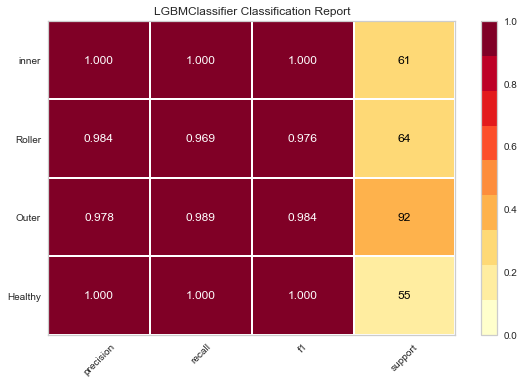

In [116]:

plot_model(f, plot = 'class_report')

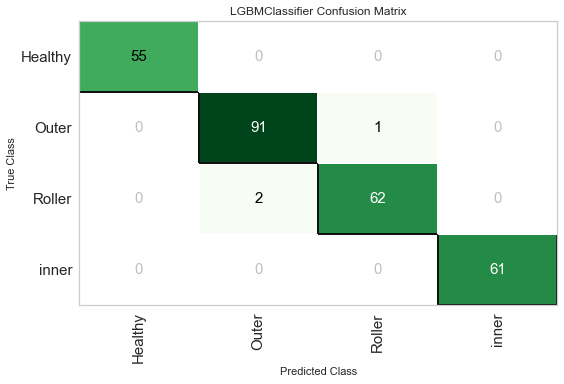

In [125]:
plot_model(f, plot = 'confusion_matrix')

In [ ]:
plot_model(f)

In [ ]:
plot_model(f, plot = 'boundary')

In [ ]:
plot_model(f, plot = 'error')

In [ ]:
plot_model(f, plot = 'parameter')

In [ ]:
evaluate_model(f)